<h1><center>Stock Market Trading Bot</center></h1>

# Importing libraries

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt

# Data Source

[Data Source](https://www.kaggle.com/ghazanfarali/ksedataset?select=UBL.csv)

# Loading data

In [2]:
UBL=pd.read_csv('Data/UBL.csv',index_col='Date',parse_dates=True)
HBL=pd.read_csv('Data/HBL.csv',index_col='Date',parse_dates=True)
NBP=pd.read_csv('Data/NBP.csv',index_col='Date',parse_dates=True)
MEBL=pd.read_csv('Data/MEBL.csv',index_col='Date',parse_dates=True)

UBL.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2005-05-26,UBL,61.25,68.00,59.10,59.85,1990000
2005-05-27,UBL,60.00,61.40,58.60,59.40,573700
2005-05-30,UBL,59.00,59.75,56.45,58.40,1026700
2005-05-31,UBL,57.50,58.50,57.10,58.35,684500
2005-06-01,UBL,58.50,61.20,58.15,60.75,1103500


# Plotting Data

Text(0.5, 1.0, 'Trend of Share Price of different KSE-30 Companies')

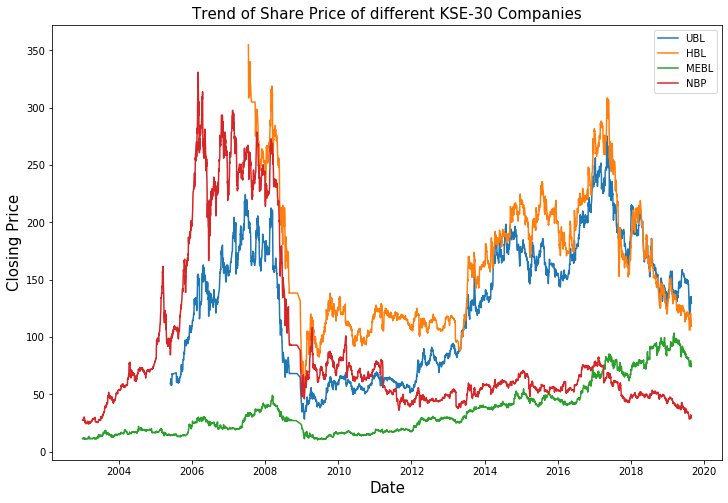

In [3]:
plt.figure(figsize=(12,8))
sns.lineplot(data=UBL.Close,label='UBL')
sns.lineplot(data=HBL.Close,label='HBL')
sns.lineplot(data=MEBL.Close,label='MEBL')
sns.lineplot(data=NBP.Close,label='NBP')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Closing Price',fontsize=15)
plt.title('Trend of Share Price of different KSE-30 Companies',fontsize=15)

# Dropping redundant feature

In [4]:
UBL.drop('Symbol',axis=1,inplace=True)
MEBL.drop('Symbol',axis=1,inplace=True)
NBP.drop('Symbol',axis=1,inplace=True)
HBL.drop('Symbol',axis=1,inplace=True)

# Changing column names in order to facilitate merge

In [5]:
UBL.columns=['UBL_Open','UBL_High','UBL_Low','UBL_Close','UBL_Volume']
MEBL.columns=['MEBL_Open','MEBL_High','MEBL_Low','MEBL_Close','MEBL_Volume']
HBL.columns=['HBL_Open','HBL_High','HBL_Low','HBL_Close','HBL_Volume']


In [6]:
UBL.info(),MEBL.info(),NBP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3449 entries, 2005-05-26 to 2019-08-30
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UBL_Open    3449 non-null   float64
 1   UBL_High    3449 non-null   float64
 2   UBL_Low     3449 non-null   float64
 3   UBL_Close   3449 non-null   float64
 4   UBL_Volume  3449 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 161.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3986 entries, 2003-01-01 to 2019-08-30
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MEBL_Open    3986 non-null   float64
 1   MEBL_High    3986 non-null   float64
 2   MEBL_Low     3986 non-null   float64
 3   MEBL_Close   3986 non-null   float64
 4   MEBL_Volume  3986 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 186.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4073 entries, 

(None, None, None)

# Merging Data Frame

In [7]:
data=pd.concat([UBL,MEBL,HBL],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4055 entries, 2003-01-01 to 2019-08-30
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UBL_Open     3449 non-null   float64
 1   UBL_High     3449 non-null   float64
 2   UBL_Low      3449 non-null   float64
 3   UBL_Close    3449 non-null   float64
 4   UBL_Volume   3449 non-null   float64
 5   MEBL_Open    3986 non-null   float64
 6   MEBL_High    3986 non-null   float64
 7   MEBL_Low     3986 non-null   float64
 8   MEBL_Close   3986 non-null   float64
 9   MEBL_Volume  3986 non-null   float64
 10  HBL_Open     2948 non-null   float64
 11  HBL_High     2948 non-null   float64
 12  HBL_Low      2948 non-null   float64
 13  HBL_Close    2948 non-null   float64
 14  HBL_Volume   2948 non-null   float64
dtypes: float64(15)
memory usage: 506.9 KB


# Reversing Data Frame

In [38]:
data1=data1.reset_index()
data1=data1.iloc[::-1]
data1=data1.set_index('Date')

In [ ]:
! pip install plotly

In [ ]:
! pip install dash==1.17.0

In [39]:
x=data1

In [40]:
x.head()

,UBL_Open,UBL_High,UBL_Low,UBL_Close,UBL_Volume,MEBL_Open,MEBL_High,MEBL_Low,MEBL_Close,MEBL_Volume,HBL_Open,HBL_High,HBL_Low,HBL_Close,HBL_Volume
Date,,,,,,,,,,,,,,,
2003-01-01,NaN,NaN,NaN,NaN,NaN,11.5,11.60,11.5,11.55,11500.0,NaN,NaN,NaN,NaN,NaN
2003-01-02,NaN,NaN,NaN,NaN,NaN,11.5,11.90,11.5,11.80,16500.0,NaN,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN,NaN,11.7,11.85,11.7,11.85,6500.0,NaN,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN,NaN,11.6,11.85,11.6,11.85,11500.0,NaN,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN,NaN,11.6,11.60,11.6,11.60,5000.0,NaN,NaN,NaN,NaN,NaN


In [41]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime



fig = go.Figure(data=[go.Candlestick(x=x.index,
                open=x['UBL_Open'],
                high=x['UBL_High'],
                low=x['UBL_Low'],
                close=x['UBL_Close'])])

fig.show()


In [43]:
data1.head()

,UBL_Open,UBL_High,UBL_Low,UBL_Close,UBL_Volume,MEBL_Open,MEBL_High,MEBL_Low,MEBL_Close,MEBL_Volume,HBL_Open,HBL_High,HBL_Low,HBL_Close,HBL_Volume
Date,,,,,,,,,,,,,,,
2003-01-01,NaN,NaN,NaN,NaN,NaN,11.5,11.60,11.5,11.55,11500.0,NaN,NaN,NaN,NaN,NaN
2003-01-02,NaN,NaN,NaN,NaN,NaN,11.5,11.90,11.5,11.80,16500.0,NaN,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN,NaN,11.7,11.85,11.7,11.85,6500.0,NaN,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN,NaN,11.6,11.85,11.6,11.85,11500.0,NaN,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN,NaN,11.6,11.60,11.6,11.60,5000.0,NaN,NaN,NaN,NaN,NaN


# Dropping Missing Values

In [44]:
data1.dropna(inplace=True)

In [45]:
data1.isnull().sum().sum()

0

# Basic correlation analysis

In [46]:
data2=data1.drop(['UBL_Volume','MEBL_Volume','HBL_Volume'],axis=1)

<IPython.core.display.Javascript object>


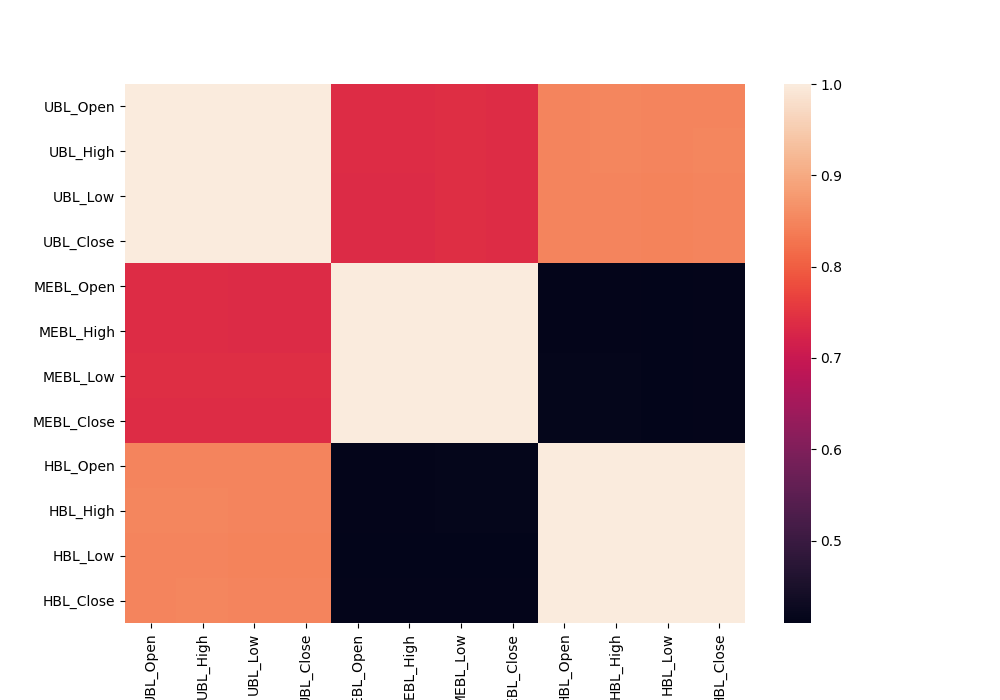

In [47]:
plt.figure(figsize=(10,7))
sns.heatmap(data=data2.corr())

# Box Plot

Text(0.5, 1.0, 'Trend of Share Price of different KSE-30 Companies')

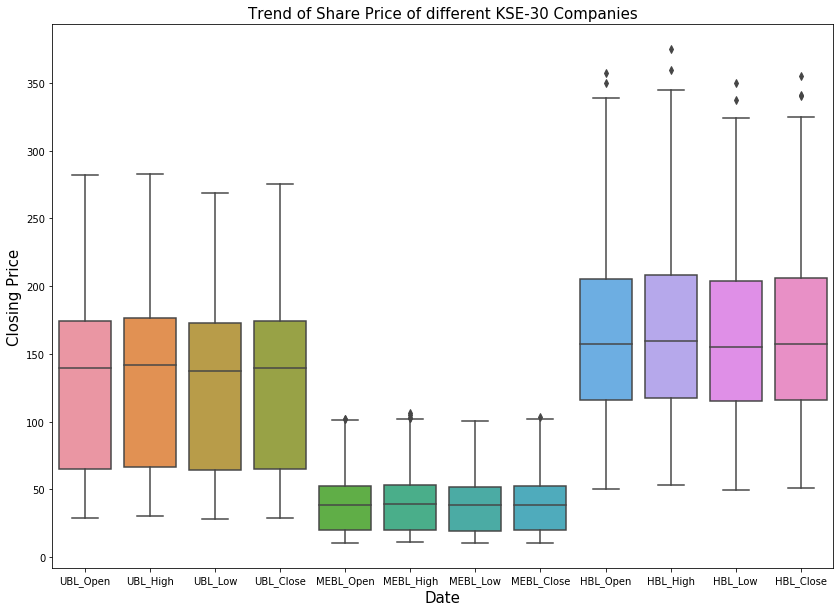

In [15]:
plt.figure(figsize=(14,10))
sns.boxplot(data=data2)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Closing Price',fontsize=15)
plt.title('Trend of Share Price of different KSE-30 Companies',fontsize=15)

# Backend of Trading Framework

# Refactored Backend

In [308]:
def shares_trading(X,total_shares,nS1,nS2,nS3,share_prices,Prediction,low_thres,high_thres):
    model1_pred,model2_pred,model3_pred=Prediction[0],Prediction[1],Prediction[2]
    pS1,pS2,pS3=(nS1*share_prices[0]),(nS2*share_prices[1]),(nS3*share_prices[2])
    if (model1_pred>model2_pred and model1_pred>model3_pred) and (pS1/100000)<high_thres and model1_pred>0:
        if (model2_pred>model3_pred) and (pS3/100000)>low_thres and model3_pred<0:
            Amount_Gained=((nS3*share_price[2])*.20)
            Brocker_fee=((nS3*share_price[2])*.20)*.15*.01
            nS3=nS3-(nS3*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[0]
            nS1=nS1+Shares_bought
            X=X-Amount_Gained
        elif (model3_pred>model2_pred) and (pS2/100000)>low_thres and model2_pred<0:
            Amount_Gained=((nS2*share_price[1])*.20)
            Brocker_fee=((nS2*share_price[1])*.20)*.15*.01
            nS2=nS2-(nS2*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[0]
            nS1=nS1+Shares_bought
            X=X-Amount_Gained
        return X,nS1,nS2,nS3
    
    elif (model2_pred>model1_pred and model2_pred>model3_pred) and (pS2/100000)<high_thres and model2_pred>0:
        if (model1_pred>model3_pred) and (pS3/100000)>low_thres and model3_pred<0:
            Amount_Gained=((nS3*share_price[2])*.20)
            Brocker_fee=((nS3*share_price[2])*.20)*.15*.01
            nS3=nS3-(nS3*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[1]
            nS2=nS2+Shares_bought
            X=X-Amount_Gained
        elif (model3_pred>model2_pred) and (pS1/100000)>low_thres and model1_pred<0 :
            Amount_Gained=((nS1*share_price[0])*.20)
            Brocker_fee=((nS1*share_price[0])*.20)*.15*.01
            nS1=nS1-(nS1*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[1]
            nS2=nS2+Shares_bought
            X=X-Amount_Gained
        return X,nS1,nS2,nS3
    
    elif (model3_pred>model1_pred and model3_pred>model2_pred) and (pS3/total_shares)<high_thres and model3_pred>0:
        if (model2_pred>model1_pred) and (pS1/100000)>low_thres and model1_pred<0:
            Amount_Gained=((nS1*share_price[0])*.2)
            Brocker_fee=((nS1*share_price[0])*.2)*.15*.01
            nS1=nS1-(nS1*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[2]
            nS3=nS3+Shares_bought
            X=X-Amount_Gained
        elif (model1_pred>model2_pred) and (pS2/100000)>low_thres and model2_pred<0:
            Amount_Gained=((nS2*share_price[1])*.2)
            Brocker_fee=((nS2*share_price[1])*.2)*.15*.01
            nS2=nS2-(nS2*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[2]
            nS3=nS3+Shares_bought
            X=X-Amount_Gained
        return X,nS1,nS2,nS3
    else:
        return X,nS1,nS2,nS3


In [288]:
def shares_trading(X,total_shares,nS1,nS2,nS3,share_prices,Prediction,low_thres,high_thres):
    model1_pred,model2_pred,model3_pred=Prediction[0],Prediction[1],Prediction[2]
    pS1,pS2,pS3=(nS1*share_prices[0]),(nS2*share_prices[1]),(nS3*share_prices[2])
    if (model1_pred>model2_pred and model1_pred>model3_pred) and (pS1/100000)<high_thres and model1_pred>0:
        if (model2_pred>model3_pred) and (pS3/100000)>low_thres:
            Amount_Gained=((nS3*share_price[2])*.20)
            Brocker_fee=((nS3*share_price[2])*.20)*.15*.01
            nS3=nS3-(nS3*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[0]
            nS1=nS1+Shares_bought
            X=X-Amount_Gained
        elif (model3_pred>model2_pred) and (pS2/100000)>low_thres:
            Amount_Gained=((nS2*share_price[1])*.20)
            Brocker_fee=((nS2*share_price[1])*.20)*.15*.01
            nS2=nS2-(nS2*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[0]
            nS1=nS1+Shares_bought
            X=X-Amount_Gained
        return X,nS1,nS2,nS3
    
    elif (model2_pred>model1_pred and model2_pred>model3_pred) and (pS2/100000)<high_thres and model2_pred>0:
        if (model1_pred>model3_pred) and (pS3/100000)>low_thres:
            Amount_Gained=((nS3*share_price[2])*.20)
            Brocker_fee=((nS3*share_price[2])*.20)*.15*.01
            nS3=nS3-(nS3*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[1]
            nS2=nS2+Shares_bought
            X=X-Amount_Gained
        elif (model3_pred>model2_pred) and (pS1/100000)>low_thres:
            Amount_Gained=((nS1*share_price[0])*.20)
            Brocker_fee=((nS1*share_price[0])*.20)*.15*.01
            nS1=nS1-(nS1*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[1]
            nS2=nS2+Shares_bought
            X=X-Amount_Gained
        return X,nS1,nS2,nS3
    
    elif (model3_pred>model1_pred and model3_pred>model2_pred) and (pS3/total_shares)<high_thres and model3_pred>0:
        if (model2_pred>model1_pred) and (pS1/100000)>low_thres:
            Amount_Gained=((nS1*share_price[0])*.2)
            Brocker_fee=((nS1*share_price[0])*.2)*.15*.01
            nS1=nS1-(nS1*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[2]
            nS3=nS3+Shares_bought
            X=X-Amount_Gained
        elif (model1_pred>model2_pred) and (pS2/100000)>low_thres:
            Amount_Gained=((nS2*share_price[1])*.2)
            Brocker_fee=((nS2*share_price[1])*.2)*.15*.01
            nS2=nS2-(nS2*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[2]
            nS3=nS3+Shares_bought
            X=X-Amount_Gained
        return X,nS1,nS2,nS3
    else:
        return X,nS1,nS2,nS3


In [227]:
def shares_trading(X,total_shares,nS1,nS2,nS3,share_prices,Prediction,low_thres,high_thres):
    model1_pred,model2_pred,model3_pred=Prediction[0],Prediction[1],Prediction[2]
    pS1,pS2,pS3=(nS1*share_prices[0]),(nS2*share_prices[1]),(nS3*share_prices[2])
    if (model1_pred>model2_pred and model1_pred>model3_pred) and (pS1/100000)<high_thres:
        if (model2_pred>model3_pred) and (pS3/100000)>low_thres:
            Amount_Gained=((nS3*share_price[2])*.20)
            Brocker_fee=((nS3*share_price[2])*.20)*.15*.01
            nS3=nS3-(nS3*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[0]
            nS1=nS1+Shares_bought
            X=X-Amount_Gained
        elif (model3_pred>model2_pred) and (pS2/100000)>low_thres:
            Amount_Gained=((nS2*share_price[1])*.20)
            Brocker_fee=((nS2*share_price[1])*.20)*.15*.01
            nS2=nS2-(nS2*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[0]
            nS1=nS1+Shares_bought
            X=X-Amount_Gained
        return X,nS1,nS2,nS3
    
    elif (model2_pred>model1_pred and model2_pred>model3_pred) and (pS2/100000)<high_thres:
        if (model1_pred>model3_pred) and (pS3/100000)>low_thres:
            Amount_Gained=((nS3*share_price[2])*.20)
            Brocker_fee=((nS3*share_price[2])*.20)*.15*.01
            nS3=nS3-(nS3*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[1]
            nS2=nS2+Shares_bought
            X=X-Amount_Gained
        elif (model3_pred>model2_pred) and (pS1/100000)>low_thres:
            Amount_Gained=((nS1*share_price[0])*.20)
            Brocker_fee=((nS1*share_price[0])*.20)*.15*.01
            nS1=nS1-(nS1*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[1]
            nS2=nS2+Shares_bought
            X=X-Amount_Gained
        return X,nS1,nS2,nS3
    
    elif (model3_pred>model1_pred and model3_pred>model2_pred) and (pS3/total_shares)<high_thres:
        if (model2_pred>model1_pred) and (pS1/100000)>low_thres:
            Amount_Gained=((nS1*share_price[0])*.2)
            Brocker_fee=((nS1*share_price[0])*.2)*.15*.01
            nS1=nS1-(nS1*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[2]
            nS3=nS3+Shares_bought
            X=X-Amount_Gained
        elif (model1_pred>model2_pred) and (pS2/100000)>low_thres:
            Amount_Gained=((nS2*share_price[1])*.2)
            Brocker_fee=((nS2*share_price[1])*.2)*.15*.01
            nS2=nS2-(nS2*.2)
            X=X+Amount_Gained-Brocker_fee
            Shares_bought=Amount_Gained/share_price[2]
            nS3=nS3+Shares_bought
            X=X-Amount_Gained
        return X,nS1,nS2,nS3
    else:
        return X,nS1,nS2,nS3


# Front End of Trading Framework

In [17]:
%matplotlib notebook
plt.rcParams['animation.html']='jshtml'

<IPython.core.display.Javascript object>


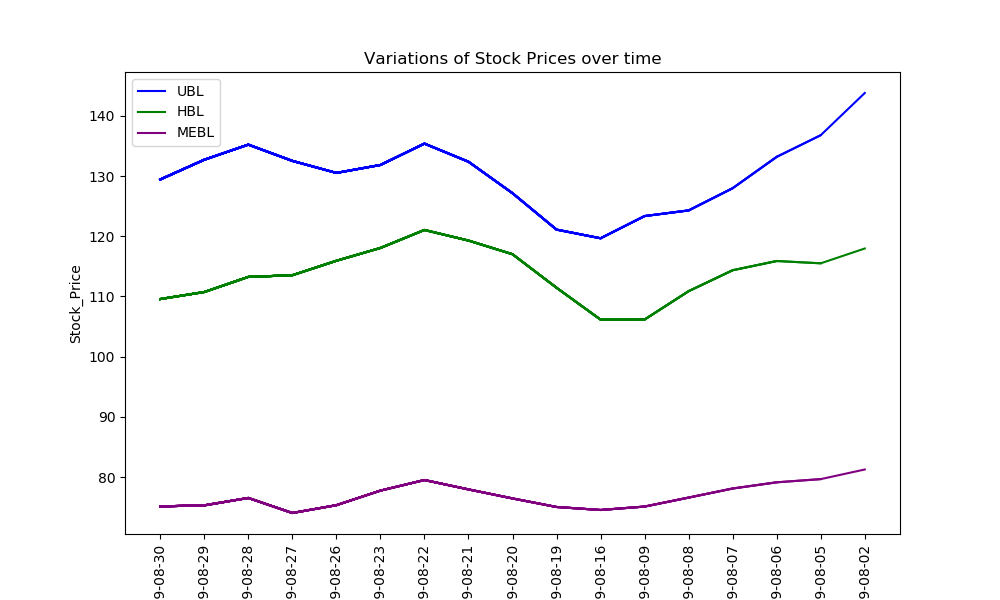

KeyboardInterrupt: 

In [20]:
data1.index=data1.index.astype('str')
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
i=0
x,y=[],[]
x1,y1=[],[]
x2,y2=[],[]
while True:
    x.append(data1.index[i])
    y.append(data1.UBL_Close[i])
    x1.append(data1.index[i])
    y1.append(data1.HBL_Close[i])
    x2.append(data1.index[i])
    y2.append(data1.MEBL_Close[i])
    ax.plot(x,y,color='blue')
    ax.plot(x1,y1,color='green')
    ax.plot(x2,y2,color='purple')
    plt.xticks(rotation=90)
    ax.legend(['UBL','HBL','MEBL'],loc='upper left')
    ax.set_xlabel('Date')
    ax.set_ylabel('Stock_Price')
    ax.set_title('Variations of Stock Prices over time')
    plt.show()
    fig.canvas.draw()
    time.sleep(1)
    i+=1

# Initialize basic amount X and number of shares

In [258]:
data3=data1.reset_index()

In [259]:
data3=data3.loc[400:,:]
data3

,Date,UBL_Open,UBL_High,UBL_Low,UBL_Close,UBL_Volume,MEBL_Open,MEBL_High,MEBL_Low,MEBL_Close,MEBL_Volume,HBL_Open,HBL_High,HBL_Low,HBL_Close,HBL_Volume
400,2009-06-19,42.61,42.65,40.80,40.80,3206500.0,10.85,11.00,10.80,11.00,83000.0,86.49,87.40,85.10,85.61,109400.0
401,2009-06-22,40.90,41.39,40.60,40.87,752600.0,11.00,11.15,10.70,10.90,17000.0,86.10,88.40,84.01,84.65,235700.0
402,2009-06-23,40.87,40.98,39.75,39.90,353200.0,10.85,11.00,10.57,11.00,18000.0,85.00,85.40,82.50,83.16,286300.0
403,2009-06-24,40.00,40.19,39.50,39.73,156600.0,11.00,11.10,10.90,11.01,11000.0,83.70,83.77,82.26,82.62,54700.0
404,2009-06-25,40.02,40.59,39.50,39.96,863600.0,11.00,11.15,11.00,11.10,18000.0,83.20,85.45,82.70,84.71,266500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2877,2019-08-26,132.00,132.50,130.13,130.53,1115900.0,77.00,77.00,74.50,75.32,139500.0,117.00,117.95,114.15,115.93,184900.0
2878,2019-08-27,132.00,133.00,127.02,132.53,932200.0,75.32,75.50,73.01,74.02,691000.0,115.00,115.89,110.75,113.53,1512700.0
2879,2019-08-28,132.90,137.25,132.25,135.23,1200800.0,74.24,77.50,73.55,76.52,825500.0,113.89,115.40,113.00,113.25,663400.0
2880,2019-08-29,133.10,136.00,132.00,132.72,466900.0,77.40,78.00,75.00,75.29,184000.0,114.00,115.00,110.00,110.74,690400.0


In [260]:
data3.reset_index(inplace=True)
data3.drop('index',inplace=True,axis=1)
data3

,Date,UBL_Open,UBL_High,UBL_Low,UBL_Close,UBL_Volume,MEBL_Open,MEBL_High,MEBL_Low,MEBL_Close,MEBL_Volume,HBL_Open,HBL_High,HBL_Low,HBL_Close,HBL_Volume
0,2009-06-19,42.61,42.65,40.80,40.80,3206500.0,10.85,11.00,10.80,11.00,83000.0,86.49,87.40,85.10,85.61,109400.0
1,2009-06-22,40.90,41.39,40.60,40.87,752600.0,11.00,11.15,10.70,10.90,17000.0,86.10,88.40,84.01,84.65,235700.0
2,2009-06-23,40.87,40.98,39.75,39.90,353200.0,10.85,11.00,10.57,11.00,18000.0,85.00,85.40,82.50,83.16,286300.0
3,2009-06-24,40.00,40.19,39.50,39.73,156600.0,11.00,11.10,10.90,11.01,11000.0,83.70,83.77,82.26,82.62,54700.0
4,2009-06-25,40.02,40.59,39.50,39.96,863600.0,11.00,11.15,11.00,11.10,18000.0,83.20,85.45,82.70,84.71,266500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,2019-08-26,132.00,132.50,130.13,130.53,1115900.0,77.00,77.00,74.50,75.32,139500.0,117.00,117.95,114.15,115.93,184900.0
2478,2019-08-27,132.00,133.00,127.02,132.53,932200.0,75.32,75.50,73.01,74.02,691000.0,115.00,115.89,110.75,113.53,1512700.0
2479,2019-08-28,132.90,137.25,132.25,135.23,1200800.0,74.24,77.50,73.55,76.52,825500.0,113.89,115.40,113.00,113.25,663400.0
2480,2019-08-29,133.10,136.00,132.00,132.72,466900.0,77.40,78.00,75.00,75.29,184000.0,114.00,115.00,110.00,110.74,690400.0


In [310]:
X=100000
nS1=(X*.33)/data3.loc[0,'UBL_Close']
nS2=(X*.33)/data3.loc[0,'HBL_Close']
nS3=(X*.33)/data3.loc[0,'MEBL_Close']
X-=X*.99


In [311]:
X,nS1,nS2,nS3

(1000.0, 808.8235294117648, 385.4689872678425, 3000.0)

# Unit Testing

In [312]:
for index in range(data3.shape[0]-1):
    total_shares=nS1+nS2+nS3
    model1_pred=data3.loc[index+1,'UBL_Close']-data3.loc[index,'UBL_Close']
    model2_pred=data3.loc[index+1,'HBL_Close']-data3.loc[index,'HBL_Close']
    model3_pred=data3.loc[index+1,'MEBL_Close']-data3.loc[index,'MEBL_Close']
    prediction=[model1_pred,model2_pred,model3_pred]
    low_thres=0.2
    high_thres=0.6
    share_price=[data3.loc[index,'UBL_Close'],data3.loc[index,'HBL_Close'],data3.loc[index,'MEBL_Close']]
    X,nS1,nS2,nS3=shares_trading(X,total_shares,nS1,nS2,nS3,share_price,
                                 prediction,low_thres,high_thres)
    if index%500==0:
        print(X,nS1,nS2,nS3)

990.1000000000004 970.5882352941177 308.375189814274 3000.0
923.1630061768292 1564.4844636573232 303.6807975913912 983.04
910.7017945288289 1564.4844636573232 375.0488895752738 629.1456000000001
904.0863285448286 1564.4844636573232 408.0948258558073 503.31648000000007
904.0863285448286 1564.4844636573232 408.0948258558073 503.31648000000007


In [313]:
X

879.2857109827155

In [314]:
pS1,pS2,pS3=(nS1*data3.loc[2481,'UBL_Close']),(nS2*data3.loc[2481,'HBL_Close']),(nS3*data3.loc[2481,'MEBL_Close'])
pS1+pS2+pS3+X

286033.5514255511

In [301]:
pS1/100000,pS2/100000,pS3/100000

(1.7153849288973533, 0.20076565388512485, 0.14364614312050947)

# Investment Portfolio

In [69]:
X,nS1/total_shares,nS2/total_shares,nS3/total_shares

(110247.50502313902,
 0.1853636588499824,
 0.6259513208996832,
 0.1886850202503344)

In [ ]:
X,nS1/total_shares,nS2/total_shares,nS3/total_shares

# Installing Gradient Boosted Tree model

In [ ]:
!pip install XGBoost

In [ ]:
data=df

In [ ]:
from sklearn import model_selection
import xgboost as xgb
from sklearn import metrics

In [ ]:
df['date'] = df.index
df['hour'] = df['date'].dt.hour
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofmonth'] = df['date'].dt.day
df['weekofyear'] = df['date'].dt.weekofyear
    
X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','Open','High','Low','Volume']]

In [ ]:
X.head()

In [ ]:
X.Open=X.Open.astype('float')
X.High=X.High.astype('float')
X.Low=X.Low.astype('float')
X.Volume=X.Volume.astype('float')

In [ ]:
y=data[['Close']]

In [ ]:
y=y.astype('float')
X

In [ ]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)

# Training model

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train)

In [ ]:
yhat=reg.predict(X_test)

In [ ]:
#sns.lineplot(data=yhat)
sns.lineplot(data=y_test)

In [ ]:
sns.lineplot(data=yhat)


In [ ]:
metrics.mean_squared_error(y_test,yhat)

In [ ]:
yhat=reg.predict(X_train)

In [ ]:
sns.lineplot(data=yhat)

In [ ]:
sns.lineplot(data=y_test)